# Data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/APPSIV/')

In [ ]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/APPSIV/LAB2-Session1')

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/APPSIV/data

/content/drive/My Drive/Colab Notebooks/APPSIV/data


In [ ]:
!unzip -j UCF5.zip

Archive:  UCF5.zip
replace desktop.ini? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: v_ApplyEyeMakeup_g01_c01.avi  
  inflating: v_ApplyEyeMakeup_g01_c02.avi  
  inflating: v_ApplyEyeMakeup_g01_c03.avi  
  inflating: v_ApplyEyeMakeup_g01_c04.avi  
  inflating: v_ApplyEyeMakeup_g01_c05.avi  
  inflating: v_ApplyEyeMakeup_g01_c06.avi  
  inflating: v_ApplyEyeMakeup_g02_c01.avi  
  inflating: v_ApplyEyeMakeup_g02_c02.avi  
  inflating: v_ApplyEyeMakeup_g02_c03.avi  
  inflating: v_ApplyEyeMakeup_g02_c04.avi  
  inflating: v_ApplyEyeMakeup_g03_c01.avi  
  inflating: v_ApplyEyeMakeup_g03_c02.avi  
  inflating: v_ApplyEyeMakeup_g03_c03.avi  
  inflating: v_ApplyEyeMakeup_g03_c04.avi  
  inflating: v_ApplyEyeMakeup_g03_c05.avi  
  inflating: v_ApplyEyeMakeup_g03_c06.avi  
  inflating: v_ApplyEyeMakeup_g04_c01.avi  
  inflating: v_ApplyEyeMakeup_g04_c02.avi  
  inflating: v_ApplyEyeMakeup_g04_c03.avi  
  inflating: v_ApplyEyeMakeup_g04_c04.avi  
  inflating: v_ApplyEyeMakeup_g04_c05.av

In [ ]:
!python3 '1_move_files.py'

Se han truncado las últimas 5000 líneas del flujo de salida.
Can't find v_Surfing_g19_c04.avi to move. Skipping.
Can't find v_Surfing_g20_c01.avi to move. Skipping.
Can't find v_Surfing_g20_c02.avi to move. Skipping.
Can't find v_Surfing_g20_c03.avi to move. Skipping.
Can't find v_Surfing_g20_c04.avi to move. Skipping.
Can't find v_Surfing_g20_c05.avi to move. Skipping.
Can't find v_Surfing_g20_c06.avi to move. Skipping.
Can't find v_Surfing_g21_c01.avi to move. Skipping.
Can't find v_Surfing_g21_c02.avi to move. Skipping.
Can't find v_Surfing_g21_c03.avi to move. Skipping.
Can't find v_Surfing_g21_c04.avi to move. Skipping.
Can't find v_Surfing_g22_c01.avi to move. Skipping.
Can't find v_Surfing_g22_c02.avi to move. Skipping.
Can't find v_Surfing_g22_c03.avi to move. Skipping.
Can't find v_Surfing_g22_c04.avi to move. Skipping.
Can't find v_Surfing_g23_c01.avi to move. Skipping.
Can't find v_Surfing_g23_c02.avi to move. Skipping.
Can't find v_Surfing_g23_c03.avi to move. Skipping.
Can

In [ ]:
!python3 '2_extract_files.py'

Generated 16 frames for v_ApplyEyeMakeup_g08_c01
Generated 16 frames for v_ApplyEyeMakeup_g08_c02
Generated 19 frames for v_ApplyEyeMakeup_g08_c03
Generated 29 frames for v_ApplyEyeMakeup_g08_c04
Generated 35 frames for v_ApplyEyeMakeup_g08_c05
Generated 23 frames for v_ApplyEyeMakeup_g09_c01
Generated 33 frames for v_ApplyEyeMakeup_g09_c02
Generated 27 frames for v_ApplyEyeMakeup_g09_c03
Generated 25 frames for v_ApplyEyeMakeup_g09_c05
Generated 25 frames for v_ApplyEyeMakeup_g09_c04
Generated 24 frames for v_ApplyEyeMakeup_g09_c06
Generated 33 frames for v_ApplyEyeMakeup_g09_c07
Generated 20 frames for v_ApplyEyeMakeup_g10_c01
Generated 13 frames for v_ApplyEyeMakeup_g10_c02
Generated 17 frames for v_ApplyEyeMakeup_g10_c04
Generated 14 frames for v_ApplyEyeMakeup_g10_c03
Generated 16 frames for v_ApplyEyeMakeup_g10_c05
Generated 19 frames for v_ApplyEyeMakeup_g11_c01
Generated 17 frames for v_ApplyEyeMakeup_g11_c03
Generated 23 frames for v_ApplyEyeMakeup_g11_c02
Generated 23 frames 

# Session 1

### Random vs fixed mode

In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/APPSIV/

/content/drive/My Drive/Colab Notebooks/APPSIV


In [ ]:
from random_vs_fixed_mode import random_vs_fixed

Running Random mode ...
- Randomly matched 20.15%

Running fixed mode ...
- ApplyEyeMakeup mode matched 22.52%
- ApplyLipstick mode matched 17.70%
- Archery mode matched 22.52%
- BabyCrawling mode matched 20.50%
- BalanceBeam mode matched 16.77%


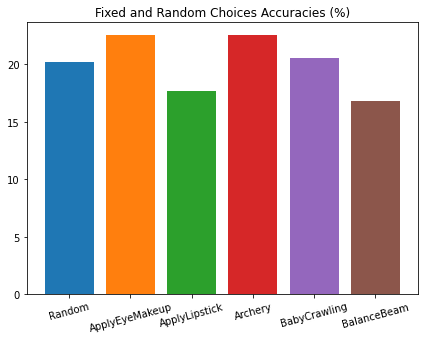

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

accuracy = {}

# Random strategy
M = 500 # Simulations
n_random = 0
print("Running Random mode ...")
for _ in range(M):
  random_acc, _ = random_vs_fixed(verbose_fix = False)
  n_random += random_acc
accuracy["Random"] = n_random/M
print("- Randomly matched %.2f%%" % (accuracy["Random"]))

# Fixed strategy
print("\nRunning fixed mode ...")
classes = ["ApplyEyeMakeup", "ApplyLipstick", "Archery", "BabyCrawling", "BalanceBeam"]
for fix_mode in classes:
  _, fixed_acc = random_vs_fixed(fix_mode)
  accuracy[fix_mode] = fixed_acc

# plot results
plt.figure(figsize=(7, 5))
plt.title("Fixed and Random Choices Accuracies (%)")
plt.bar(*zip(*accuracy.items()), color=cm.tab10.colors[:len(accuracy)])
plt.xticks(rotation=15)
plt.savefig('resume_sesion_1.png', bbox_inches="tight")

# Session 2

In [ ]:
sys.path.append('/content/drive/My Drive/Colab Notebooks/APPSIV/LAB2-Session2/')

In [ ]:
from data import DataSet
from train_cnn import train
from validate_cnn import validate
from plot_train_cnnlog import plot_accuracy


seq_length = 5

### 5 classes

In [ ]:
class_limit = 5 
data = DataSet(seq_length, class_limit)
classes = data.classes
print(f"{class_limit} classes = {classes}")

5 classes = ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam']


In [ ]:
model = train(classes)

87924736/87910968 [==============================] - 1s 0us/step
Found 9490 images belonging to 5 classes.
Found 3909 images belonging to 5 classes.
Loading network from ImageNet weights.
Epoch 1/10
10/10 [==============================] - 93s 9s/step - loss: 7.2826 - accuracy: 0.3625 - val_loss: 1.5171 - val_accuracy: 0.4375
Epoch 2/10
10/10 [==============================] - 64s 7s/step - loss: 1.1855 - accuracy: 0.6250 - val_loss: 1.5345 - val_accuracy: 0.5375
Epoch 3/10
10/10 [==============================] - 64s 7s/step - loss: 0.9520 - accuracy: 0.7250 - val_loss: 0.3818 - val_accuracy: 0.8500
Epoch 4/10
10/10 [==============================] - 63s 7s/step - loss: 0.4689 - accuracy: 0.8500 - val_loss: 0.6319 - val_accuracy: 0.8000
Epoch 5/10
10/10 [==============================] - 65s 7s/step - loss: 0.5422 - accuracy: 0.8500 - val_loss: 0.7132 - val_accuracy: 0.7750
Epoch 6/10
10/10 [==============================] - 60s 6s/step - loss: 1.1792 - accuracy: 0.7250 - val_loss: 0.

In [ ]:
# Summary model trained
model.summary()

Model: "ft-inceptionv3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                  

--------------------------------------------------------------------------------
data/test/ApplyLipstick/v_ApplyLipstick_g06_c02-0014.jpg


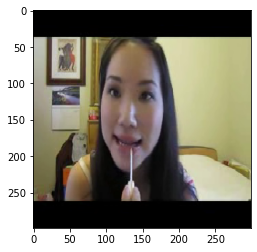

ApplyLipstick: 0.99
ApplyEyeMakeup: 0.01
BalanceBeam: 0.00
Archery: 0.00
BabyCrawling: 0.00
--------------------------------------------------------------------------------
data/test/ApplyLipstick/v_ApplyLipstick_g07_c03-0003.jpg


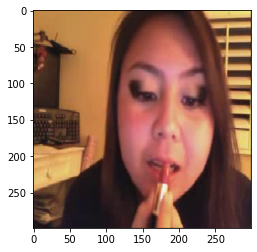

ApplyLipstick: 1.00
ApplyEyeMakeup: 0.00
BalanceBeam: 0.00
BabyCrawling: 0.00
Archery: 0.00
--------------------------------------------------------------------------------
data/test/ApplyEyeMakeup/v_ApplyEyeMakeup_g06_c06-0010.jpg


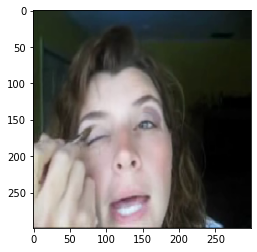

ApplyEyeMakeup: 0.83
ApplyLipstick: 0.17
BabyCrawling: 0.00
Archery: 0.00
BalanceBeam: 0.00
--------------------------------------------------------------------------------
data/test/ApplyLipstick/v_ApplyLipstick_g06_c02-0021.jpg


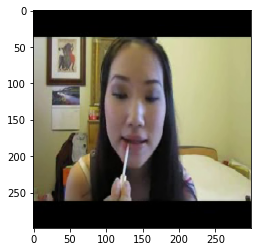

ApplyLipstick: 0.94
ApplyEyeMakeup: 0.06
BalanceBeam: 0.00
Archery: 0.00
BabyCrawling: 0.00
--------------------------------------------------------------------------------
data/test/BalanceBeam/v_BalanceBeam_g05_c01-0001.jpg


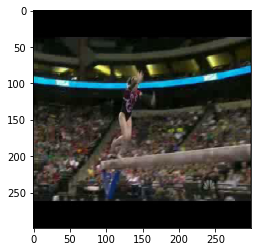

BalanceBeam: 1.00
Archery: 0.00
BabyCrawling: 0.00
ApplyEyeMakeup: 0.00
ApplyLipstick: 0.00


In [ ]:
# Validate model
checkpoint = "data/checkpoints/5-inception.002-0.17.hdf5"
validate(classes, checkpoint)

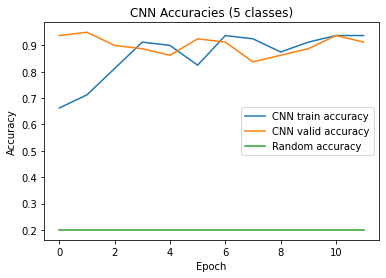

In [ ]:
# plot results
training_log = "data/logs/5-inception-training-1652454036.4590917.log"
plot_accuracy(training_log, class_limit)

## 10 classes

*Note: Additional video files are required (Step 3)
Download UCF-101 from https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
Select and unrar only the 20 first classes: ApplyEyeMakeup, ApplyLipstick, …, BrushingTeeth.
Copy all “.avi” files into /data directory
*Note: Each configuration has a different data preparation (Step 3).
2_extract_files.py (Basic run: class_limit 5, 10, 15 and 20 classes and seq_legth 5)

In [ ]:
!unrar e UCF101.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from UCF101.rar

Extracting  v_ApplyEyeMakeup_g01_c01.avi                                   0%  OK 
Extracting  v_ApplyEyeMakeup_g01_c02.avi                                   0%  OK 
Extracting  v_ApplyEyeMakeup_g01_c03.avi                                   0%  OK 
Extracting  v_ApplyEyeMakeup_g01_c04.avi                                   0%  OK 
Extracting  v_ApplyEyeMakeup_g01_c05.avi                                   0%  OK 
Extracting  v_ApplyEyeMakeup_g01_c06.avi                                   0%  OK 
Extracting  v_ApplyEyeMakeup_g02_c01.avi                                   0%  OK 
Extracting  v_ApplyEyeMakeup_g02_c02.avi                                   0%  OK 
Extracting  v_ApplyEyeMakeup_g02_c03.avi                                   0%  OK 
Extracting  v_ApplyEyeMakeup_g02_c04.avi                                 

In [ ]:
!python3 '1_move_files.py'

Se han truncado las últimas 5000 líneas del flujo de salida.
Can't find v_Surfing_g19_c04.avi to move. Skipping.
Can't find v_Surfing_g20_c01.avi to move. Skipping.
Can't find v_Surfing_g20_c02.avi to move. Skipping.
Can't find v_Surfing_g20_c03.avi to move. Skipping.
Can't find v_Surfing_g20_c04.avi to move. Skipping.
Can't find v_Surfing_g20_c05.avi to move. Skipping.
Can't find v_Surfing_g20_c06.avi to move. Skipping.
Can't find v_Surfing_g21_c01.avi to move. Skipping.
Can't find v_Surfing_g21_c02.avi to move. Skipping.
Can't find v_Surfing_g21_c03.avi to move. Skipping.
Can't find v_Surfing_g21_c04.avi to move. Skipping.
Can't find v_Surfing_g22_c01.avi to move. Skipping.
Can't find v_Surfing_g22_c02.avi to move. Skipping.
Can't find v_Surfing_g22_c03.avi to move. Skipping.
Can't find v_Surfing_g22_c04.avi to move. Skipping.
Can't find v_Surfing_g23_c01.avi to move. Skipping.
Can't find v_Surfing_g23_c02.avi to move. Skipping.
Can't find v_Surfing_g23_c03.avi to move. Skipping.
Can

In [18]:
!python3 '2_extract_files.py'

Se han truncado las últimas 5000 líneas del flujo de salida.
  libswresample   2.  9.100 /  2.  9.100
  libpostproc    54.  7.100 / 54.  7.100
Input #0, avi, from 'test/CricketShot/v_CricketShot_g06_c01.avi':
  Metadata:
    encoder         : MEncoder r34118-4.2.5
  Duration: 00:00:04.88, start: 0.000000, bitrate: 844 kb/s
    Stream #0:0: Video: mpeg4 (Simple Profile) (XVID / 0x44495658), yuv420p, 320x240 [SAR 1:1 DAR 4:3], 714 kb/s, SAR 4096:4083 DAR 16384:12249, 25 fps, 25 tbr, 25 tbn, 25 tbc
    Stream #0:1: Audio: mp3 (U[0][0][0] / 0x0055), 44100 Hz, stereo, s16p, 117 kb/s
Stream mapping:
  Stream #0:0 -> #0:0 (mpeg4 (native) -> png (native))
Press [q] to stop, [?] for help
Output #0, image2, to 'test/CricketShot/v_CricketShot_g06_c01-%04d.jpg':
  Metadata:
    encoder         : Lavf57.83.100
    Stream #0:0: Video: png, rgb24, 320x240 [SAR 4096:4083 DAR 16384:12249], q=2-31, 200 kb/s, 3 fps, 3 tbn, 3 tbc
    Metadata:
      encoder         : Lavc57.107.100 png
frame=   16 fps=0.0

In [21]:
class_limit = 10
data = DataSet(seq_length, class_limit)
classes = data.classes
print(f"{class_limit} classes = {classes}")

10 classes = ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress']


In [22]:
model = train(classes)

87924736/87910968 [==============================] - 1s 0us/step
Found 18452 images belonging to 10 classes.
Found 6851 images belonging to 10 classes.
Loading network from ImageNet weights.
Epoch 1/10
10/10 [==============================] - 59s 5s/step - loss: 8.2947 - accuracy: 0.0625 - val_loss: 2.9033 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 50s 5s/step - loss: 2.3800 - accuracy: 0.4250 - val_loss: 1.9537 - val_accuracy: 0.5125
Epoch 3/10
10/10 [==============================] - 44s 4s/step - loss: 1.3038 - accuracy: 0.5875 - val_loss: 1.0792 - val_accuracy: 0.6500
Epoch 4/10
10/10 [==============================] - 45s 5s/step - loss: 1.0118 - accuracy: 0.6500 - val_loss: 1.5764 - val_accuracy: 0.6375
Epoch 5/10
10/10 [==============================] - 44s 4s/step - loss: 0.8937 - accuracy: 0.7750 - val_loss: 0.5664 - val_accuracy: 0.8375
Epoch 6/10
10/10 [==============================] - 45s 5s/step - loss: 0.7348 - accuracy: 0.7500 - val_loss:

--------------------------------------------------------------------------------
data/test/BodyWeightSquats/v_BodyWeightSquats_g07_c01-0010.jpg


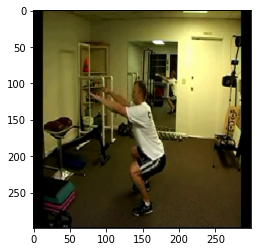

BenchPress: 0.91
Archery: 0.07
ApplyEyeMakeup: 0.00
BaseballPitch: 0.00
BabyCrawling: 0.00
--------------------------------------------------------------------------------
data/test/BoxingPunchingBag/v_BoxingPunchingBag_g06_c06-0002.jpg


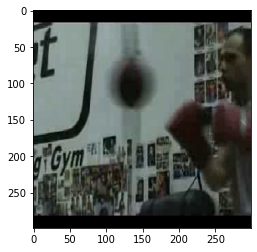

BenchPress: 0.42
BandMarching: 0.16
BalanceBeam: 0.14
Archery: 0.08
ApplyEyeMakeup: 0.07
--------------------------------------------------------------------------------
data/test/BalanceBeam/v_BalanceBeam_g05_c01-0001.jpg


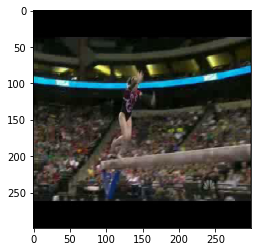

BalanceBeam: 0.82
BaseballPitch: 0.04
BasketballDunk: 0.04
BandMarching: 0.03
Archery: 0.02
--------------------------------------------------------------------------------
data/test/BaseballPitch/v_BaseballPitch_g05_c04-0007.jpg


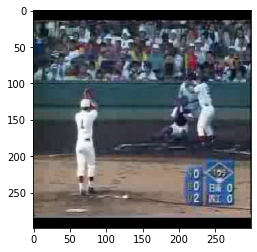

BaseballPitch: 0.98
BasketballDunk: 0.01
BalanceBeam: 0.00
BandMarching: 0.00
Basketball: 0.00
--------------------------------------------------------------------------------
data/test/BandMarching/v_BandMarching_g03_c06-0039.jpg


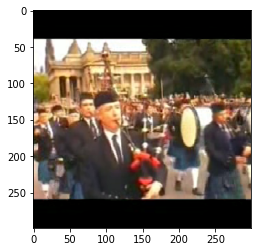

BandMarching: 0.97
BasketballDunk: 0.01
BenchPress: 0.01
ApplyEyeMakeup: 0.00
BalanceBeam: 0.00


In [23]:
# Validate model
checkpoint = "data/checkpoints/10-inception.011-0.21.hdf5"
validate(classes, checkpoint)

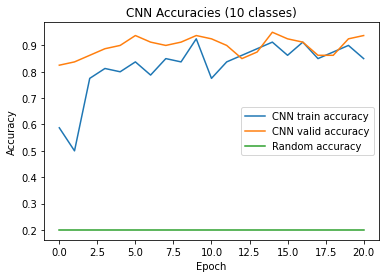

In [24]:
# plot results
training_log = "data/logs/10-inception-training-1652463027.015716.log"
plot_accuracy(training_log, class_limit)

## 15 classes

In [25]:
class_limit = 15
data = DataSet(seq_length, class_limit)
classes = data.classes
print(f"{class_limit} classes = {classes}")

15 classes = ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress', 'Biking', 'Billiards', 'BlowDryHair', 'BlowingCandles', 'BodyWeightSquats']


In [26]:
model = train(classes)

Found 30147 images belonging to 15 classes.
Found 11130 images belonging to 15 classes.
Loading network from ImageNet weights.
Epoch 1/10
10/10 [==============================] - 50s 5s/step - loss: 8.0202 - accuracy: 0.1000 - val_loss: 2.6576 - val_accuracy: 0.3375
Epoch 2/10
10/10 [==============================] - 42s 4s/step - loss: 2.6543 - accuracy: 0.2625 - val_loss: 2.2492 - val_accuracy: 0.3875
Epoch 3/10
10/10 [==============================] - 43s 4s/step - loss: 2.3001 - accuracy: 0.3750 - val_loss: 1.2508 - val_accuracy: 0.5875
Epoch 4/10
10/10 [==============================] - 41s 4s/step - loss: 1.1212 - accuracy: 0.6500 - val_loss: 1.3122 - val_accuracy: 0.5875
Epoch 5/10
10/10 [==============================] - 41s 4s/step - loss: 1.3434 - accuracy: 0.6500 - val_loss: 1.1042 - val_accuracy: 0.6625
Epoch 6/10
10/10 [==============================] - 40s 4s/step - loss: 1.1344 - accuracy: 0.6875 - val_loss: 0.6136 - val_accuracy: 0.8000
Epoch 7/10
10/10 [===============

--------------------------------------------------------------------------------
data/test/BlowingCandles/v_BlowingCandles_g04_c05-0003.jpg


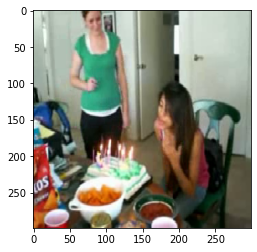

BlowingCandles: 1.00
BenchPress: 0.00
BabyCrawling: 0.00
BandMarching: 0.00
Basketball: 0.00
--------------------------------------------------------------------------------
data/test/BlowDryHair/v_BlowDryHair_g01_c02-0021.jpg


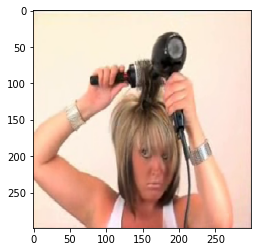

BlowDryHair: 0.96
Archery: 0.01
ApplyEyeMakeup: 0.01
Biking: 0.00
BenchPress: 0.00
--------------------------------------------------------------------------------
data/test/Drumming/v_Drumming_g05_c03-0021.jpg


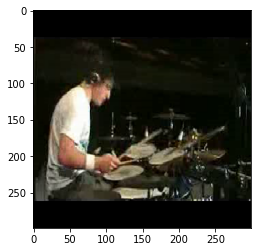

BlowingCandles: 0.24
Archery: 0.23
BenchPress: 0.12
BodyWeightSquats: 0.07
BabyCrawling: 0.07
--------------------------------------------------------------------------------
data/test/Billiards/v_Billiards_g05_c02-0040.jpg


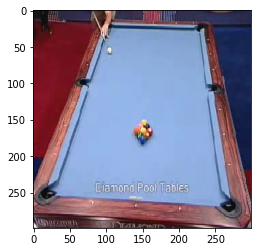

Billiards: 1.00
Basketball: 0.00
BasketballDunk: 0.00
BaseballPitch: 0.00
Archery: 0.00
--------------------------------------------------------------------------------
data/test/BlowingCandles/v_BlowingCandles_g05_c02-0005.jpg


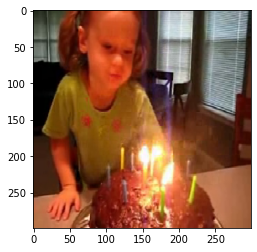

BlowingCandles: 0.95
BabyCrawling: 0.01
BandMarching: 0.01
Basketball: 0.01
BenchPress: 0.00


In [27]:
# Validate model
checkpoint = "data/checkpoints/15-inception.014-0.21.hdf5"
validate(classes, checkpoint)

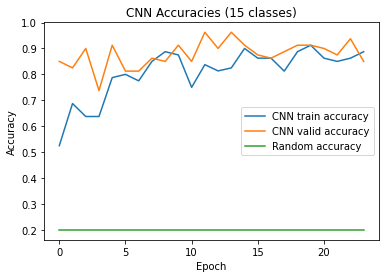

In [28]:
# plot results
training_log = "data/logs/15-inception-training-1652463027.015716.log"
plot_accuracy(training_log, class_limit)

## 20 classes

In [29]:
class_limit = 20
data = DataSet(seq_length, class_limit)
classes = data.classes
print(f"{class_limit} classes = {classes}")

20 classes = ['ApplyEyeMakeup', 'ApplyLipstick', 'Archery', 'BabyCrawling', 'BalanceBeam', 'BandMarching', 'BaseballPitch', 'Basketball', 'BasketballDunk', 'BenchPress', 'Biking', 'Billiards', 'BlowDryHair', 'BlowingCandles', 'BodyWeightSquats', 'Bowling', 'BoxingPunchingBag', 'BoxingSpeedBag', 'BreastStroke', 'BrushingTeeth']


In [30]:
model = train(classes)

Found 42255 images belonging to 20 classes.
Found 16222 images belonging to 20 classes.
Loading network from ImageNet weights.
Epoch 1/10
10/10 [==============================] - 45s 4s/step - loss: 7.0392 - accuracy: 0.1875 - val_loss: 3.5589 - val_accuracy: 0.2750
Epoch 2/10
10/10 [==============================] - 37s 4s/step - loss: 2.9905 - accuracy: 0.3125 - val_loss: 2.7832 - val_accuracy: 0.2625
Epoch 3/10
10/10 [==============================] - 37s 4s/step - loss: 2.5217 - accuracy: 0.3000 - val_loss: 2.3386 - val_accuracy: 0.3875
Epoch 4/10
10/10 [==============================] - 37s 4s/step - loss: 2.2057 - accuracy: 0.3750 - val_loss: 1.4152 - val_accuracy: 0.5375
Epoch 5/10
10/10 [==============================] - 36s 4s/step - loss: 1.4371 - accuracy: 0.5625 - val_loss: 1.3217 - val_accuracy: 0.5750
Epoch 6/10
10/10 [==============================] - 42s 4s/step - loss: 1.8338 - accuracy: 0.5000 - val_loss: 1.8814 - val_accuracy: 0.4750
Epoch 7/10
10/10 [===============

--------------------------------------------------------------------------------
data/test/CleanAndJerk/v_CleanAndJerk_g03_c01-0020.jpg


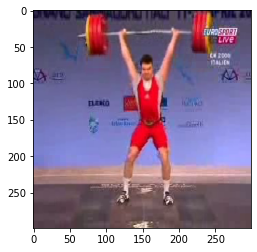

BenchPress: 0.57
BodyWeightSquats: 0.17
BoxingPunchingBag: 0.05
BoxingSpeedBag: 0.04
BalanceBeam: 0.04
--------------------------------------------------------------------------------
data/test/BrushingTeeth/v_BrushingTeeth_g04_c02-0012.jpg


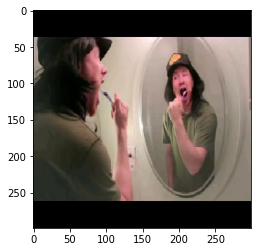

BrushingTeeth: 0.66
ApplyLipstick: 0.22
ApplyEyeMakeup: 0.06
BoxingSpeedBag: 0.01
BlowDryHair: 0.01
--------------------------------------------------------------------------------
data/test/ApplyLipstick/v_ApplyLipstick_g07_c04-0018.jpg


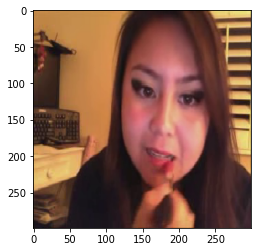

ApplyLipstick: 0.79
BrushingTeeth: 0.12
ApplyEyeMakeup: 0.07
BlowingCandles: 0.01
BabyCrawling: 0.00
--------------------------------------------------------------------------------
data/test/Fencing/v_Fencing_g01_c06-0017.jpg


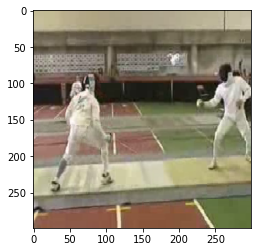

BalanceBeam: 0.32
Basketball: 0.28
BaseballPitch: 0.18
Bowling: 0.08
BoxingSpeedBag: 0.03
--------------------------------------------------------------------------------
data/test/ApplyEyeMakeup/v_ApplyEyeMakeup_g04_c04-0019.jpg


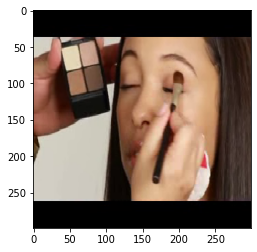

ApplyEyeMakeup: 0.61
ApplyLipstick: 0.26
BrushingTeeth: 0.09
Bowling: 0.01
BreastStroke: 0.01


In [32]:
# Validate model
checkpoint = "data/checkpoints/20-inception.006-0.51.hdf5"
validate(classes, checkpoint)

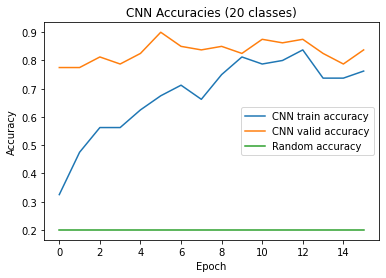

In [33]:
# plot results
training_log = "data/logs/20-inception-training-1652463027.015716.log"
plot_accuracy(training_log, class_limit)